In [1]:
import numpy as np
import cv2
import os
import time
from datetime import datetime
import matplotlib.pyplot as plt

print("OpenCV:", cv2.__version__)

OpenCV: 4.4.0


## [insecam](https://www.insecam.org/): free ip cameras

In [2]:
url = 0 # La webcam propia
url = "http://24.103.196.243/cgi-bin/viewer/video.jpg" # una calle
url = "http://12.216.61.98:82/mjpg/video.mjpg" # Perretes
url = "http://46.84.170.81/videostream.cgi?user=admin&pwd=" # Vacas
url = "http://207.199.201.177/mjpg/video.mjpg" # Caballo

In [3]:
cap = cv2.VideoCapture(url)

ok, frame = cap.read()
if ok: print("Frame shape:", frame.shape)
else:  print("Error")
    
#cap.release()

Frame shape: (400, 640, 3)


In [3]:
cap = cv2.VideoCapture(url)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

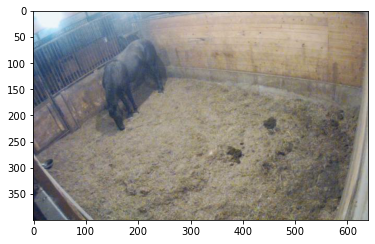

In [5]:
plt.imshow(frame[:,:,::-1])

In [6]:
print("0 - POS_MSEC     ", cap.get(0))
print("1 - POS_FRAMES   ", cap.get(1))
print("2 - POS_AVI_RATIO", cap.get(2))
print("3 - FRAME_WIDTH  ", cap.get(3))
print("4 - FRAME_HEIGHT ", cap.get(4))
print("5 - FPS          ", cap.get(5))
print("6 - FOURCC       ", cap.get(6))
print("7 - FRAME_COUNT  ", cap.get(7))

0 - POS_MSEC      0.0
1 - POS_FRAMES    0.0
2 - POS_AVI_RATIO 0.0
3 - FRAME_WIDTH   0.0
4 - FRAME_HEIGHT  0.0
5 - FPS           0.0
6 - FOURCC        0.0
7 - FRAME_COUNT   0.0


# Export to video

In [8]:
# Define the codec and create VideoWriter object
cap = cv2.VideoCapture(url)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
#out    = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))
out    = cv2.VideoWriter('output.avi', fourcc, 25.0, (800,600))

for i in range(100):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)
    else:
        print(i, "Error")

# Release everything if job is finished
cap.release()
out.release()

# Export images

In [9]:
str(time())

'1599560013.4912894'

In [13]:
datetime.today().strftime('%Y/%m/%d-%H:%M:%S')

'2020/09/08-12:15:19'

In [24]:
recording_total_secons = 60 # Grabar durante 1 min
recording_period       = 2 # Tomar imagen cada 2 segundos
folder_name            = "images"


# Create folder for images in current path if not exists
current_path = os.getcwd()
folder_path = os.path.join(current_path, folder_name)
if not os.path.exists(folder_path):
    os.mkdir(folder_path)
    

cap = cv2.VideoCapture(url)


while(True): # for i in range(10):
    ret, frame = cap.read()

    # Save frame
    filename = datetime.today().strftime('%Y.%m.%d-%H:%M:%S') # str(time.time())
    print(filename)
    file_path = os.path.join(folder_path, filename + ".jpg")
    cv2.imwrite(file_path, frame)
    
    time.sleep(recording_period)

cap.release()

2020.09.08-12:28:09
2020.09.08-12:28:11
2020.09.08-12:28:13
2020.09.08-12:28:15
2020.09.08-12:28:17
2020.09.08-12:28:19
2020.09.08-12:28:21
2020.09.08-12:28:23


KeyboardInterrupt: 